# 1. NumPy

In [1]:
import numpy as np

In [3]:
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]

In [4]:
c = np.array(cvalues)
print(c)

[20.1 20.8 21.9 22.5 22.7 22.3 21.8 21.2 20.9 20.1]


Let's assume, we want to turn the values into degrees Fahrenheit. This is very easy to accomplish with a numpy array. The solution to our problem can be achieved by simple **scalar multiplication**:

In [5]:
print(c*9/5+32)

[68.18 69.44 71.42 72.5  72.86 72.14 71.24 70.16 69.62 68.18]


In [6]:
print(c)
# c is unchanged

[20.1 20.8 21.9 22.5 22.7 22.3 21.8 21.2 20.9 20.1]


In [7]:
# solution in core python
fvalues = [
    x*9/5+32 for x in cvalues
]
print(fvalues)

[68.18, 69.44, 71.42, 72.5, 72.86, 72.14, 71.24000000000001, 70.16, 69.62, 68.18]


So far, we referred to C as an array. The internal type is "ndarray" or to be even more precise "C is an instance of the class numpy.ndarray":

In [8]:
type(c)

numpy.ndarray

# 2. Matplotlib

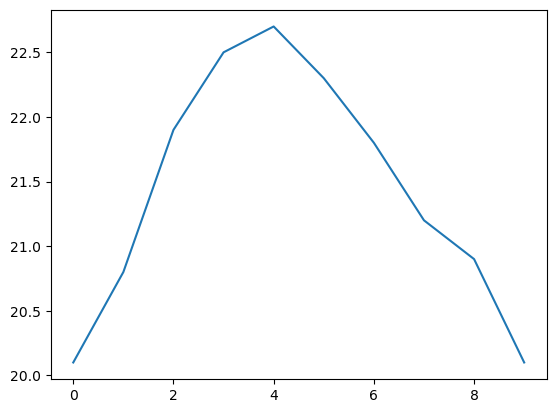

In [9]:
import matplotlib.pyplot as plt

plt.plot(c)
plt.show()

The function plot uses the values of the array C for the values of the ordinate, i.e. the y-axis. The indices of the array C are taken as values for the abscissa, i.e. the x-axis.

# 3. Memory Consumption

In [13]:
from sys import getsizeof as size

lst = [24,12,57]

size_of_list_object = size(lst)
size_of_elements = len(lst)*size(lst[0])

total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)

Size without the size of the elements:  88
Size of all the elements:  84
Total size of list, including elements:  172


The size of a Python list consists of the general list information, the size needed for the references to the
elements and the size of all the elements of the list. If we apply sys.getsizeof to a list, we get only the size
without the size of the elements. In the previous example, we made the assumption that all the integer
elements of our list have the same size. Of course, this is not valid in general, because memory consumption
will be higher for larger integers.

******
We will check now, how the memory usage changes, if we add another integer element to the list. We also
look at an empty list:

In [14]:
lst = [24,12,57,42]

size_of_list_object = size(lst)
size_of_elements = len(lst)*size(lst[0])

total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)

lst = []
print("Empty list size: ", size(lst))

Size without the size of the elements:  88
Size of all the elements:  112
Total size of list, including elements:  200
Empty list size:  56


The size of a list "lst" without the size of the elements can be calculated with:
$$ 64 + 8 * len(lst) $$
To get the complete size of an arbitrary list of integers, we have to add the sum of all the sizes of the integers.

In [15]:
# Compare numpy list size
a = np.array([24,12,57])
print(size(a))

124


In [16]:
e = np.array([])
print(size(e))

112


In [18]:
a = np.array([24,12,57],np.int8)
print(size(a) - size(e))

3


In [19]:
a = np.array([24,12,57],np.int16)
print(size(a) - size(e))

a = np.array([24,12,57],np.int32)
print(size(a) - size(e))

a = np.array([24,12,57],np.int64)
print(size(a) - size(e))

6
12
24


# 4. Time Comparision

In [3]:
import numpy as np

In [17]:
from decimal import Decimal

In [32]:
import time
size_of_vec = 1000

def pure_python_version():
    t1 = time.time()
    x = range(size_of_vec)
    y = range(size_of_vec)
    z = [x[i]+y[i] for i in range(len(x))]
    return time.time()-t1

def numpy_version():
    t1 = time.time()
    x = np.arange(size_of_vec)
    y = np.arange(size_of_vec)
    z = x+y
    return time.time()-t1

In [31]:
t1 = pure_python_version()
t2 = numpy_version()

print(t1,t2)
print("NumPy is in this example ",t1/t2," faster!")

0.02532029151916504 0.0


ZeroDivisionError: float division by zero

A Timer object has a timeit method. timeit is called with a parameter number:
```
timeit(number=1000000)
```
The main statement will be executed "number" times. This executes the setup statement once, and then returns
the time it takes to execute the main statement a "number" of times. It returns the time in seconds.


In [33]:
import numpy as np
from timeit import Timer

size_of_vec = 1000

X_list = range(size_of_vec)
Y_list = range(size_of_vec)

X = np.arange(size_of_vec)
Y = np.arange(size_of_vec)

def pure_python_version():
    Z = [X_list[i] + Y_list[i] for i in range(len(X_list)) ]

def numpy_version():
    Z = X + Y

#timer_obj = Timer("x = x + 1", "x = 0")
timer_obj1 = Timer("pure_python_version()",
    "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()",
    "from __main__ import numpy_version")

for i in range(3):
    t1 = timer_obj1.timeit(10)
    t2 = timer_obj2.timeit(10)
    print("time for pure Python version: ", t1)
    print("time for Numpy version: ", t2)
    print(f"Numpy was {t1 / t2:7.2f} times faster!")

time for pure Python version:  0.007648700004210696
time for Numpy version:  0.00016909997793845832
Numpy was   45.23 times faster!
time for pure Python version:  0.003108000004431233
time for Numpy version:  6.890000076964498e-05
Numpy was   45.11 times faster!
time for pure Python version:  0.005172699980903417
time for Numpy version:  6.670001312159002e-05
Numpy was   77.55 times faster!


The repeat() method is a convenience to call timeit() multiple times and return a list of results:

In [34]:
print(timer_obj1.repeat(repeat=3, number=10))
print(timer_obj2.repeat(repeat=3, number=10))


[0.004674600000726059, 0.004917099984595552, 0.003501800005324185]
[0.000687599997036159, 3.779999678954482e-05, 3.0199997127056122e-05]


# 5. NumPy Tutorial: Creating Arrays

**'arange'**: uses a
given distance.
***
**'linspace'**: needs the number of
elements and creates the distance automatically.

## 5.1 **arange**

```
arange([start,] stop[, step], [, dtype=None])
```

arange returns evenly spaced values within a given interval. The values are generated within the half-open
interval `[start, stop)` If the function is used with integers, it is nearly equivalent to the Python built-in function
range, but arange returns an ndarray rather than a list iterator as range does. If the 'start' parameter is not given,
it will be set to 0. The end of the interval is determined by the parameter 'stop'. Usually, the interval will not
include this value, except in some cases where 'step' is not an integer and floating point round-off affects the
length of output ndarray. The spacing between two adjacent values of the output array is set with the optional
parameter 'step'. The default value for 'step' is 1. If the parameter 'step' is given, the 'start' parameter cannot be
optional, i.e. it has to be given as well. The type of the output array can be specified with the parameter 'dtype'.
If it is not given, the type will be automatically inferred from the other input arguments.

In [2]:
import numpy as np

a = np.arange(1,10)
print(a)

x = range(1,10)
print(x)

# further arange examples
x = np.arange(10.4)
print(x)

x = np.arange(0.5,10.4,0.8)
print(x)

[1 2 3 4 5 6 7 8 9]
range(1, 10)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.5  1.3  2.1  2.9  3.7  4.5  5.3  6.1  6.9  7.7  8.5  9.3 10.1]


 "End of interval": The interval does
not include this value, except in some cases where step is not an integer and floating point round-off
affects the length of out.

NB: *When using a non-integer step, such
as 0.1, the results will often not be consistent. It is better to use numpy.linspace for these cases.*

## 5.2 Linspace

`linspace(start, stop, num=50, endpoint=True, retstep=False)`

linspace returns an ndarray, consisting of 'num' equally spaced samples in the closed interval [start, stop] or the
half-open interval [start, stop). If a closed or a half-open interval will be returned, depends on whether
'endpoint' is True or False. The parameter 'start' defines the start value of the sequence which will be created.
'stop' will the end value of the sequence, unless 'endpoint' is set to False. Note that the step size changes when 'endpoint' is False. The number of samples to be generated can be set
with 'num', which defaults to 50. If the optional parameter 'endpoint' is set to True (the default), 'stop' will be
the last sample of the sequence. Otherwise, it is not included.

In [1]:
import numpy as np

In [2]:
# 50 values between 1 and 10:
print(np.linspace(1,10))

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]


In [3]:
# 7 values between 1 and 10
print(np.linspace(1,10,7))

[ 1.   2.5  4.   5.5  7.   8.5 10. ]


In [4]:
# excluding endpoint:
print(np.linspace(1,10,7,endpoint=False))

[1.         2.28571429 3.57142857 4.85714286 6.14285714 7.42857143
 8.71428571]


 If the optional parameter 'retstep' is set, the function
will also return the value of the spacing between adjacent values. So, the function will return a tuple
('samples', 'step'):

In [6]:
samples, spacing = np.linspace(1,10,retstep=True)
print(spacing)

0.1836734693877551


In [7]:
samples, spacing = np.linspace(1,10,20,endpoint=True, retstep=True)
print(spacing)

0.47368421052631576


In [9]:
samples, spacing = np.linspace(1,10,20,endpoint=False,retstep=True)
print(spacing)

0.45


## 5.3 Zero-dimensional Arrays in NumPy

 Scalars are zero dimensional.

In [1]:
import numpy as np

x = np.array(42)

print("x: ", x)
print("The type of x: ", type(x))
print("The dimension of x: ",
     np.ndim(x))

x:  42
The type of x:  <class 'numpy.ndarray'>
The dimension of x:  0


## 5.4 One-dimensional Arrays